In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
# Load Dataset
df = pd.read_csv("/Users/shubhamkumar/Downloads/PS_2026.02.18_08.10.50.csv",sep=",",comment="#",engine="python")
df.head(5)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(39386, 289)

In [4]:
df.info

<bound method DataFrame.info of        rowid    pl_name hostname pl_letter    hd_name   hip_name  \
0          1   11 Com b   11 Com         b  HD 107383  HIP 60202   
1          2   11 Com b   11 Com         b  HD 107383  HIP 60202   
2          3   11 Com b   11 Com         b  HD 107383  HIP 60202   
3          4   11 UMi b   11 UMi         b  HD 136726  HIP 74793   
4          5   11 UMi b   11 UMi         b  HD 136726  HIP 74793   
...      ...        ...      ...       ...        ...        ...   
39381  39382  ups And d  ups And         d    HD 9826   HIP 7513   
39382  39383  ups Leo b  ups Leo         b        NaN        NaN   
39383  39384   xi Aql b   xi Aql         b  HD 188310  HIP 97938   
39384  39385   xi Aql b   xi Aql         b  HD 188310  HIP 97938   
39385  39386   xi Aql b   xi Aql         b  HD 188310  HIP 97938   

              tic_id                   gaia_dr2_id  \
0       TIC 72437047  Gaia DR2 3946945413106333696   
1       TIC 72437047  Gaia DR2 394694541310

In [5]:
#Select Expected Features
features = [
    'pl_rade',
    'pl_bmasse',
    'pl_orbper',
    'pl_orbsmax',
    'pl_eqt',
    'pl_dens',
    'st_teff',
    'st_lum',
    'st_met',
    'st_spectype'
]

df = df[features]


In [6]:
df.isnull().sum()

pl_rade        12275
pl_bmasse      32185
pl_orbper       3361
pl_orbsmax     17338
pl_eqt         22127
pl_dens        36635
st_teff         3543
st_lum         29695
st_met         14561
st_spectype    36466
dtype: int64

In [7]:
#Data Quality Assessment
#Missing & Null Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print("\nMissing Values Report:\n")
print(missing_df)



Missing Values Report:

             Missing Count  Missing Percentage (%)
pl_rade              12275               31.165897
pl_bmasse            32185               81.716854
pl_orbper             3361                8.533489
pl_orbsmax           17338               44.020718
pl_eqt               22127               56.179861
pl_dens              36635               93.015285
st_teff               3543                8.995582
st_lum               29695               75.394810
st_met               14561               36.969989
st_spectype          36466               92.586198


In [8]:
#Duplicate Records
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)



Number of Duplicate Rows: 5585


In [9]:
# Inconsistent Units Check
print("\nChecking for inconsistent values:")

print("Negative planet radius:", (df['pl_rade'] <= 0).sum())
print("Negative planet mass:", (df['pl_bmasse'] <= 0).sum())
print("Negative orbital period:", (df['pl_orbper'] <= 0).sum())
print("Negative density:", (df['pl_dens'] <= 0).sum())
print("Unrealistic star temperature (<2000K or >10000K):",
      ((df['st_teff'] < 2000) | (df['st_teff'] > 10000)).sum())



Checking for inconsistent values:
Negative planet radius: 0
Negative planet mass: 0
Negative orbital period: 0
Negative density: 0
Unrealistic star temperature (<2000K or >10000K): 29


In [10]:
#Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:\n")
print(summary_stats)



Summary Statistics:

             pl_rade     pl_bmasse     pl_orbper    pl_orbsmax        pl_eqt  \
count   27111.000000   7201.000000  3.602500e+04  22048.000000  17259.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        5.454208    737.987766  1.214352e+04      4.746389    880.007198   
std        71.772121   1555.937820  2.119221e+06    180.667391    428.612227   
min         0.270000      0.015000  9.070629e-02      0.004400     34.000000   
25%         1.550491     13.200000  4.408400e+00      0.054595    568.000000   
50%         2.300000    189.737000  1.034971e+01      0.101000    797.000000   
75%         3.270515    680.152791  2.667569e+01      0.220000   1104.000000   
max      4282.980000  25426.400000  4.020000e+08  19000.000000   4050.000000   

            pl_de

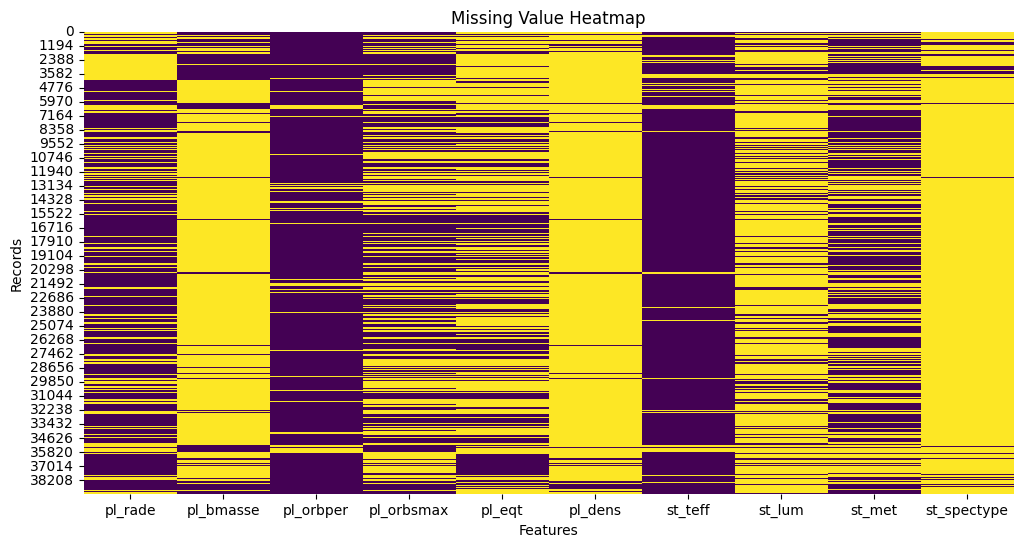

In [11]:
#Missing Value Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()


In [12]:
# Remove Completely Missing Rows
df = df.dropna(how='all')


In [13]:
# Handle Planetary Physical Values
planetary_features = [
    'pl_rade',
    'pl_bmasse',
    'pl_orbper',
    'pl_orbsmax',
    'pl_eqt',
    'pl_dens',
    'st_lum',
    'st_met'
]

planetary_imputer = SimpleImputer(strategy='median')
df[planetary_features] = planetary_imputer.fit_transform(
    df[planetary_features]
)

In [14]:
# Handle Star Temperature(Median)
star_temp_imputer = SimpleImputer(strategy='median')
df[['st_teff']] = star_temp_imputer.fit_transform(df[['st_teff']])

In [15]:
# Handle Categorical Feature(Mode)

star_type_imputer = SimpleImputer(strategy='most_frequent')
df[['st_spectype']] = star_type_imputer.fit_transform(df[['st_spectype']])

In [16]:
# check
print("Missing values after handling:\n")
print(df.isnull().sum())

print("\nFinal Dataset Shape:", df.shape)
print(df.head())

Missing values after handling:

pl_rade        0
pl_bmasse      0
pl_orbper      0
pl_orbsmax     0
pl_eqt         0
pl_dens        0
st_teff        0
st_lum         0
st_met         0
st_spectype    0
dtype: int64

Final Dataset Shape: (39276, 10)
   pl_rade    pl_bmasse   pl_orbper  pl_orbsmax  pl_eqt  pl_dens  st_teff  \
0      2.3  4914.898486  323.210000       1.178   797.0     1.32   4874.0   
1      2.3  6165.600000  326.030000       1.290   797.0     1.32   4742.0   
2      2.3  5434.700000   10.349714       1.210   797.0     1.32   5612.0   
3      2.3  3337.070000  516.220000       1.540   797.0     1.32   4340.0   
4      2.3  4684.814200  516.219970       1.530   797.0     1.32   4213.0   

    st_lum  st_met st_spectype  
0  1.97823 -0.2600      G8 III  
1  2.24300 -0.3500      G8 III  
2 -0.08496 -0.0025        G0 V  
3 -0.08496  0.0400      K4 III  
4 -0.08496 -0.0200        G0 V  


In [ ]:
print("\nDuplicate Rows:", original_df.duplicated().sum())
original_df = original_df.drop_duplicates()

required_columns = [
    'pl_rade',      # Planet Radius (Earth radii)
    'pl_bmasse',    # Planet Mass (Earth masses)
    'pl_orbper',    # Orbital Period (Days)
    'pl_orbsmax',   # Semi-major axis (AU)
    'pl_eqt',       # Equilibrium Temperature (K)
    'pl_dens',      # Planet Density (g/cm^3)
    'st_teff',      # Star Effective Temperature (K)
    'st_lum',       # Star Luminosity (log10 solar units)
    'st_met',       # Star Metallicity [dex]
    'st_spectype'   # Star Spectral Type (O, B, A, F, G, K, M)
]

df = original_df[required_columns]

print("\nShape After Feature Selection:", df.shape)


In [35]:
# outlier detection
#Z-Score Method
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))

# Keep rows where all z-scores < 3
df_z = df[(z_scores < 3).all(axis=1)]

print("Shape after Z-score filtering:", df_z.shape)


Shape after Z-score filtering: (31656, 33)


In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Now apply IQR safely
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme outliers
df_iqr = numeric_df[
    ~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
]

print("Shape after IQR filtering:", df_iqr.shape)


Shape after IQR filtering: (6448, 9)


In [20]:
import numpy as np

# Copy dataframe
df_capped = df.copy()

# Select numeric columns only
numeric_cols = df_capped.select_dtypes(include=[np.number]).columns

# Apply IQR capping only on numeric columns
for col in numeric_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_capped[col] = np.where(
        df_capped[col] < lower, lower,
        np.where(df_capped[col] > upper, upper, df_capped[col])
    )

print("Outlier capping completed successfully.")


Outlier capping completed successfully.


In [21]:
# Remove negative radius and mass
#df = df[df['pl_rade'] > 0]
#df = df[df['pl_bmasse'] > 0]

# Remove impossible temperature (< -27K approx)
#df = df[df['pl_eqt'] > -27]

#print("Shape after removing impossible values:", df.shape)


In [22]:
# •	Unit Standardization:
KM_TO_EARTH_RADIUS = 1 / 6371       # km → Earth radii
KG_TO_EARTH_MASS = 1 / 5.972e24     # kg → Earth mass
METER_TO_AU = 1 / 1.496e11          # meters → AU
CELSIUS_TO_KELVIN = 273.15


In [23]:
# Radius conversion (km)
if df['pl_rade'].mean() > 100:   # Earth radii normally < 50
    df['pl_rade'] = df['pl_rade'] * KM_TO_EARTH_RADIUS

# Mass conversion (kg)
if df['pl_bmasse'].mean() > 1e6:
    df['pl_bmasse'] = df['pl_bmasse'] * KG_TO_EARTH_MASS

# Distance conversion (meters)
if df['pl_orbsmax'].mean() > 100:
    df['pl_orbsmax'] = df['pl_orbsmax'] * METER_TO_AU

# Temperature conversion (Celsius)
if df['pl_eqt'].mean() < 200:
    df['pl_eqt'] = df['pl_eqt'] + CELSIUS_TO_KELVIN

if df['st_teff'].mean() < 200:
    df['st_teff'] = df['st_teff'] + CELSIUS_TO_KELVIN
    
print("Unit standardized dataset summary:")
print(df.describe())


Unit standardized dataset summary:
            pl_rade     pl_bmasse     pl_orbper    pl_orbsmax        pl_eqt  \
count  39276.000000  39276.000000  3.927600e+04  39276.000000  39276.000000   
mean       4.477252    290.255224  1.113922e+04      2.708739    833.475742   
std       59.647509    699.156778  2.029620e+06    135.381522    287.091352   
min        0.270000      0.015000  9.070629e-02      0.004400     34.000000   
25%        1.880000    189.737000  4.754001e+00      0.088000    797.000000   
50%        2.300000    189.737000  1.034971e+01      0.101000    797.000000   
75%        2.710000    189.737000  2.385162e+01      0.114825    797.000000   
max     4282.980000  25426.400000  4.020000e+08  19000.000000   4050.000000   

            pl_dens       st_teff        st_lum        st_met  
count  39276.000000  39276.000000  39276.000000  39276.000000  
mean       1.657254   5473.712771     -0.101231     -0.014995  
std       17.219809    950.897771      0.358775      0.180687

In [24]:
#Feature Engineering
#Habitability Score Index (HSI)
# Normalized similarity functions
df['temp_score'] = 1 - abs(df['pl_eqt'] - 288) / 288
df['radius_score'] = 1 - abs(df['pl_rade'] - 1)
df['distance_score'] = 1 - abs(df['pl_orbsmax'] - 1)
df['luminosity_score'] = 1 - abs(df['st_lum'] - 1)

# Clip values between 0 and 1
score_cols = ['temp_score', 'radius_score', 'distance_score', 'luminosity_score']
df[score_cols] = df[score_cols].clip(0, 1)

# Final Habitability Score
df['habitability_index'] = df[score_cols].mean(axis=1)


In [25]:
#Stellar Compatibility Index (SCI)
df['star_temp_score'] = 1 - abs(df['st_teff'] - 5778) / 5778
df['star_lum_score'] = 1 - abs(df['st_lum'] - 1)

df[['star_temp_score', 'star_lum_score']] = df[
    ['star_temp_score', 'star_lum_score']
].clip(0, 1)

df['stellar_compatibility_index'] = df[
    ['star_temp_score', 'star_lum_score']
].mean(axis=1)


In [26]:
#Orbital Stability Factor (OSF)
df['orbital_period_score'] = 1 - abs(df['pl_orbper'] - 365) / 365
df['orbit_distance_score'] = 1 - abs(df['pl_orbsmax'] - 1)

df[['orbital_period_score', 'orbit_distance_score']] = df[
    ['orbital_period_score', 'orbit_distance_score']
].clip(0, 1)

df['orbital_stability_factor'] = df[
    ['orbital_period_score', 'orbit_distance_score']
].mean(axis=1)


In [27]:
# Categorical Encoding (Star Type → One-Hot)
df['star_class'] = df['st_spectype'].str[0]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[['star_class']])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['star_class'])
)

df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
df.drop(columns=['st_spectype', 'star_class'], inplace=True)


In [28]:
#Feature Scaling
scaler = StandardScaler()

scale_features = [
    'pl_rade',
    'pl_bmasse',
    'pl_orbper',
    'pl_orbsmax',
    'pl_eqt',
    'st_teff',
    'st_lum',
    'habitability_index',
    'stellar_compatibility_index',
    'orbital_stability_factor'
]

df[scale_features] = scaler.fit_transform(df[scale_features])


In [29]:
#Target Variable Creation
#Binary Classification
df['habitability_class'] = np.where(
    df['habitability_index'] > 0.6, 1, 0
)


In [30]:
#Multi-Class Target
def habitability_label(score):
    if score >= 0.7:
        return 'High'
    elif score >= 0.4:
        return 'Moderate'
    else:
        return 'Low'

df['habitability_level'] = df['habitability_index'].apply(habitability_label)


In [31]:
# Save the final preprocessed dataset
df.to_csv("preprocessed.csv", index=False)

print(" Dataset saved as preprocessed.csv")


 Dataset saved as preprocessed.csv
